In [1]:
import csv
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Resource: https://www.census.gov/quickfacts/fact/table/cookcountyillinois,kingscountybrooklynboroughnewyork,multnomahcountyoregon,kingcountywashington,newyorkcountymanhattanboroughnewyork,sanfranciscocountycalifornia/PST045217


In [2]:
out_df = pd.read_csv('Quick Facts - Out of State.csv')


out_df.drop(columns = ["Fact Note"], inplace=True)
out_df.drop(columns = ["Value Note for Cook County, Illinois"], inplace=True)
out_df.drop(columns = ["Value Note for Kings County (Brooklyn Borough), New York"], inplace=True)
out_df.drop(columns = ["Value Note for Multnomah County, Oregon"], inplace=True)
out_df.drop(columns = ["Value Note for King County, Washington"], inplace=True)
out_df.drop(columns = ["Value Note for New York County (Manhattan Borough), New York"], inplace=True)
out_df.drop(columns = ["Value Note for San Francisco County, California"], inplace=True)


cols = list(out_df.columns.values)
cols

column_titles = ['Fact',
                'San Francisco County, California',
                'New York County (Manhattan Borough), New York', 
                 'King County, Washington',
                'Multnomah County, Oregon', 
                 'Kings County (Brooklyn Borough), New York',
                'Cook County, Illinois']

out_df.reindex(columns = column_titles)




,Fact,"San Francisco County, California","New York County (Manhattan Borough), New York","King County, Washington","Multnomah County, Oregon","Kings County (Brooklyn Borough), New York","Cook County, Illinois"
0,"Population estimates, July 1, 2018, (V2018)",NaN,NaN,NaN,NaN,NaN,NaN
1,"Population estimates, July 1, 2017, (V2017)","884,363","1,664,727","2,188,649","807,555","2,648,771","5,211,263"
2,"Population estimates base, April 1, 2010, (V2...",NaN,NaN,NaN,NaN,NaN,NaN
3,"Population estimates base, April 1, 2010, (V2...","805,193","1,586,184","1,931,281","735,169","2,504,706","5,195,075"
4,"Population, percent change - April 1, 2010 (es...",NaN,NaN,NaN,NaN,NaN,NaN
5,"Population, percent change - April 1, 2010 (es...",9.8%,5.0%,13.3%,9.8%,5.8%,0.3%
6,"Population, Census, April 1, 2010","805,235","1,585,873","1,931,249","735,334","2,504,700","5,194,675"
7,"Persons under 5 years, percent",4.5%,4.8%,5.9%,5.6%,7.3%,6.2%
8,"Persons under 18 years, percent",13.4%,14.4%,20.4%,19.1%,22.9%,22.0%
9,"Persons 65 years and over, percent",15.4%,16.0%,13.0%,13.0%,13.5%,14.3%


In [3]:
#Pulling Race Information
out_race = out_df.iloc[11:18,0:7]
out_race





,Fact,"Cook County, Illinois","Kings County (Brooklyn Borough), New York","Multnomah County, Oregon","King County, Washington","New York County (Manhattan Borough), New York","San Francisco County, California"
11,"White alone, percent",65.6%,49.2%,79.5%,68.0%,64.4%,53.1%
12,"Black or African American alone, percent",24.0%,34.3%,6.0%,6.8%,17.9%,5.5%
13,"American Indian and Alaska Native alone, percent",0.7%,0.9%,1.4%,1.0%,1.2%,0.7%
14,"Asian alone, percent",7.7%,12.8%,7.9%,18.2%,13.0%,35.9%
15,Native Hawaiian and Other Pacific Islander alo...,0.1%,0.1%,0.7%,0.9%,0.2%,0.4%
16,"Two or More Races, percent",1.9%,2.6%,4.6%,5.1%,3.4%,4.3%
17,"Hispanic or Latino, percent",25.5%,19.1%,11.6%,9.7%,26.1%,15.2%


In [4]:
#Used Lambda to convert to Float
out_race['Cook County, Illinois'] = out_race['Cook County, Illinois'].apply(lambda x: float(x[:-1]))
out_race['Kings County (Brooklyn Borough), New York'] = out_race['Kings County (Brooklyn Borough), New York'].apply(lambda x: float(x[:-1]))
out_race['Multnomah County, Oregon'] = out_race['Multnomah County, Oregon'].apply(lambda x: float(x[:-1]))
out_race['King County, Washington'] = out_race['King County, Washington'].apply(lambda x: float(x[:-1]))
out_race['New York County (Manhattan Borough), New York'] = out_race['New York County (Manhattan Borough), New York'].apply(lambda x: float(x[:-1]))
out_race['San Francisco County, California'] = out_race['San Francisco County, California'].apply(lambda x: float(x[:-1]))

#Removed ",percent"
out_race['Fact'] = out_race['Fact'].apply(lambda x: x[:-9])
out_race

,Fact,"Cook County, Illinois","Kings County (Brooklyn Borough), New York","Multnomah County, Oregon","King County, Washington","New York County (Manhattan Borough), New York","San Francisco County, California"
11,White alone,65.6,49.2,79.5,68.0,64.4,53.1
12,Black or African American alone,24.0,34.3,6.0,6.8,17.9,5.5
13,American Indian and Alaska Native alone,0.7,0.9,1.4,1.0,1.2,0.7
14,Asian alone,7.7,12.8,7.9,18.2,13.0,35.9
15,Native Hawaiian and Other Pacific Islander alone,0.1,0.1,0.7,0.9,0.2,0.4
16,Two or More Races,1.9,2.6,4.6,5.1,3.4,4.3
17,Hispanic or Latino,25.5,19.1,11.6,9.7,26.1,15.2


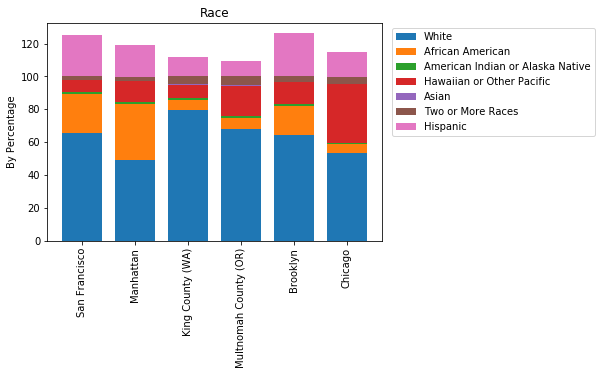

In [5]:
#Hispanic is over the 100% should we make it by itself or add it to "white"

race = ["White alone", "Black or African American Alone", "American Indian and Alaska Native alone", "Asian alone",
       "Native Hawaiian and Other Pacific Islander alone", "Two or More Races", "Hispanic or Latino"]

county = ['San Francisco County, California',
                'New York County (Manhattan Borough), New York', 
                 'King County, Washington',
                'Multnomah County, Oregon', 
                 'Kings County (Brooklyn Borough), New York',
                'Cook County, Illinois']

N = 6
ind = np.arange(N)
width = .75

#White
white = out_race.iloc[0, 1:7]

#African America
aa = out_race.iloc[1, 1:7]

#American Indian & Alaska Native
ai = out_race.iloc[2, 1:7]

#Native Hawaiian and Other Pacific
hawaiian = out_race.iloc[3, 1:7]

#Asian
asian = out_race.iloc[4, 1:7]

#Two or More Races
two = out_race.iloc[5, 1:7]

#Hispanic or Latino
hispanic = out_race.iloc[6, 1:7]

p1 = plt.bar(ind,white,width)
p2 = plt.bar(ind,aa,width, bottom=white)
p3 = plt.bar(ind,ai,width, bottom=white+aa)
p4 = plt.bar(ind,hawaiian,width, bottom=white+aa+ai)
p5 = plt.bar(ind,asian,width, bottom=white+aa+ai+hawaiian)
p6 = plt.bar(ind,two,width, bottom =white+aa+ai+hawaiian+asian)
p7 = plt.bar(ind,hispanic,width, bottom =white+aa+ai+hawaiian+asian+two)




plt.ylabel('By Percentage')
plt.title('Race')
plt.xticks(ind, ('San Francisco', 'Manhattan', 'King County (WA)', 'Multnomah County (OR)',
                'Brooklyn', 'Chicago'),rotation='vertical')

                
plt.legend((p1[0], p2[0], p3[0], 
            p4[0], p5[0],p6[0], p7[0]),
           ('White', 'African American', 
            'American Indian or Alaska Native',
            'Hawaiian or Other Pacific', 'Asian', 
            'Two or More Races', 'Hispanic'),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))

plt.show()

#Mostly white. A lot of Hawaiian or Other Pacific in Chicago.
#add states

In [6]:
#Age

out_age =out_df.iloc[7:10,0:7]
out_age.head()

#

,Fact,"Cook County, Illinois","Kings County (Brooklyn Borough), New York","Multnomah County, Oregon","King County, Washington","New York County (Manhattan Borough), New York","San Francisco County, California"
7,"Persons under 5 years, percent",6.2%,7.3%,5.6%,5.9%,4.8%,4.5%
8,"Persons under 18 years, percent",22.0%,22.9%,19.1%,20.4%,14.4%,13.4%
9,"Persons 65 years and over, percent",14.3%,13.5%,13.0%,13.0%,16.0%,15.4%


In [7]:
out_age['Cook County, Illinois'] = out_age['Cook County, Illinois'].apply(lambda x: float(x[:-1]))
out_age['Kings County (Brooklyn Borough), New York'] = out_age['Kings County (Brooklyn Borough), New York'].apply(lambda x: float(x[:-1]))
out_age['Multnomah County, Oregon'] = out_age['Multnomah County, Oregon'].apply(lambda x: float(x[:-1]))
out_age['King County, Washington'] = out_age['King County, Washington'].apply(lambda x: float(x[:-1]))
out_age['New York County (Manhattan Borough), New York'] = out_age['New York County (Manhattan Borough), New York'].apply(lambda x: float(x[:-1]))
out_age['San Francisco County, California'] = out_age['San Francisco County, California'].apply(lambda x: float(x[:-1]))


out_age['Fact'] = out_age['Fact'].apply(lambda x: x[:-9])
out_age





,Fact,"Cook County, Illinois","Kings County (Brooklyn Borough), New York","Multnomah County, Oregon","King County, Washington","New York County (Manhattan Borough), New York","San Francisco County, California"
7,Persons under 5 years,6.2,7.3,5.6,5.9,4.8,4.5
8,Persons under 18 years,22.0,22.9,19.1,20.4,14.4,13.4
9,Persons 65 years and over,14.3,13.5,13.0,13.0,16.0,15.4


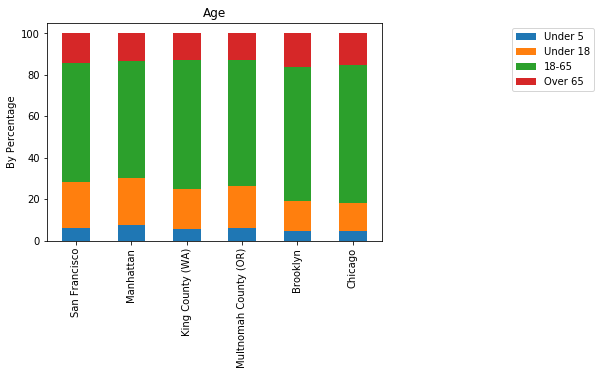

In [8]:
#add 18-65
#add "bottom"


county = ['San Francisco County, California',
                'New York County (Manhattan Borough), New York', 
                 'King County, Washington',
                'Multnomah County, Oregon', 
                 'Kings County (Brooklyn Borough), New York',
                'Cook County, Illinois']

age = ['under 5 years','under 18 years','65 years and over, percent']

N = 6
ind = np.arange(N)
width = 0.50

#Under 5
under_5 = out_age.iloc[0, 1:7]

#Under 18
under_18 = out_age.iloc[1, 1:7]

#Over 65
over_65 = out_age.iloc[2, 1:7]

#18-65
middle_age = 100-under_5-under_18-over_65


#Plot
p1 = plt.bar(ind,under_5,width)
p2 = plt.bar(ind,under_18,width,bottom=under_5)
p3 = plt.bar(ind,middle_age,width,bottom=under_5+under_18)
p4 = plt.bar(ind,over_65,width,bottom=under_5+under_18+middle_age)


plt.legend((p1[0], p2[0], p3[0],p4[0]),
           ('Under 5', 'Under 18', '18-65', 
            'Over 65',),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))



plt.ylabel('By Percentage')
plt.title('Age')
plt.xticks(ind, ('San Francisco', 'Manhattan', 'King County (WA)', 'Multnomah County (OR)',
                'Brooklyn', 'Chicago'),rotation='vertical')

plt.show()

#Millenials taking over. 

In [9]:
#Sex
out_sex = out_df.iloc[10:11,0:7]
out_sex = pd.DataFrame(out_sex)
out_sex

,Fact,"Cook County, Illinois","Kings County (Brooklyn Borough), New York","Multnomah County, Oregon","King County, Washington","New York County (Manhattan Borough), New York","San Francisco County, California"
10,"Female persons, percent",51.4%,52.6%,50.5%,49.9%,52.6%,49.0%


In [10]:
out_sex['Cook County, Illinois'] = out_sex['Cook County, Illinois'].apply(lambda x: float(x[:-1]))
out_sex['Kings County (Brooklyn Borough), New York'] = out_sex['Kings County (Brooklyn Borough), New York'].apply(lambda x: float(x[:-1]))
out_sex['Multnomah County, Oregon'] = out_sex['Multnomah County, Oregon'].apply(lambda x: float(x[:-1]))
out_sex['King County, Washington'] = out_sex['King County, Washington'].apply(lambda x: float(x[:-1]))
out_sex['New York County (Manhattan Borough), New York'] = out_sex['New York County (Manhattan Borough), New York'].apply(lambda x: float(x[:-1]))
out_sex['San Francisco County, California'] = out_sex['San Francisco County, California'].apply(lambda x: float(x[:-1]))


out_sex['Fact'] = out_sex['Fact'].apply(lambda x: x[:-9])
out_sex


,Fact,"Cook County, Illinois","Kings County (Brooklyn Borough), New York","Multnomah County, Oregon","King County, Washington","New York County (Manhattan Borough), New York","San Francisco County, California"
10,Female persons,51.4,52.6,50.5,49.9,52.6,49.0


In [11]:
female = out_sex.iloc[0]
female
# female = female.drop('Los Angeles County, California')


Fact                                             Female persons
Cook County, Illinois                                      51.4
Kings County (Brooklyn Borough), New York                  52.6
Multnomah County, Oregon                                   50.5
King County, Washington                                    49.9
New York County (Manhattan Borough), New York              52.6
San Francisco County, California                             49
Name: 10, dtype: object

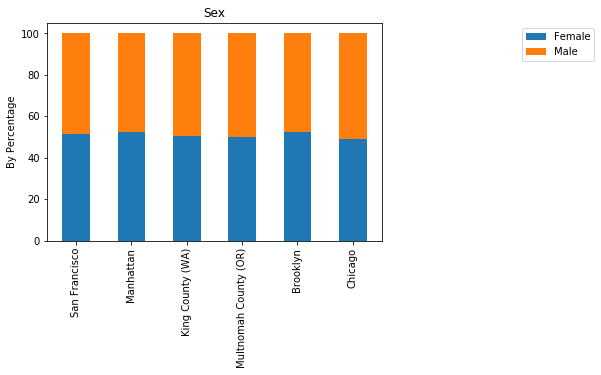

In [12]:


county = ['San Francisco County, California',
                'New York County (Manhattan Borough), New York', 
                 'King County, Washington',
                'Multnomah County, Oregon', 
                 'Kings County (Brooklyn Borough), New York',
                'Cook County, Illinois']

N = 6
ind = np.arange(N)
width = 0.50

#Female
female = out_sex.iloc[0, 1:7]

#Male
male_sex = 100-female


#Plot
p1 = plt.bar(ind,female,width)
p2 = plt.bar(ind,male_sex,width,bottom=female)

plt.legend((p1[0], p2[0]),
           ('Female', 'Male'),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))

plt.ylabel('By Percentage')
plt.title('Sex')
plt.xticks(ind, ('San Francisco', 'Manhattan', 'King County (WA)', 'Multnomah County (OR)',
                'Brooklyn', 'Chicago'),rotation='vertical')

plt.show()

In [13]:
marital_out_df = pd.read_csv('Out of State - Marital.csv')

# marital_ca_df.reindex(columns = column_titles)

marital_out_df=marital_out_df.transpose()

marital_out_df.head(115-150)

marital_out_df.to_csv('outstate_marital_transpose.csv')
marital_out_df

# cols = list(marital_ca_df.columns.values)
# cols

# column_titles = ['Fact',
#                 'San Francisco County, California',
#                 'Alameda County, California', 
#                  'San Mateo County, California',
#                 'Contra Costa County, California', 
#                  'Los Angeles County, California',
#                 'Santa Clara County, California']
marital_out_df = marital_out_df.reindex(columns = [0, 3, 5, 4, 2, 1])
# marital_ca_df.reindex(columns = column_titles)
marital_out_df



,0,3,5,4,2,1
Id,0500000US06075,0500000US36061,0500000US53033,0500000US41051,0500000US36047,0500000US17031
Id2,6075,36061,53033,41051,36047,17031
Geography,"San Francisco County, California","New York County, New York","King County, Washington","Multnomah County, Oregon","Kings County, New York","Cook County, Illinois"
Total; Estimate; Population 15 years and over,764957,1448890,1748964,657931,2118407,4260374
Total; Margin of Error; Population 15 years and over,108,48,*****,*****,82,42
Now married (except separated); Estimate; Population 15 years and over,39.8,34.1,50.1,42.5,40.2,42
Now married (except separated); Margin of Error; Population 15 years and over,0.5,0.4,0.4,0.6,0.3,0.2
Widowed; Estimate; Population 15 years and over,4.7,4.8,4.2,4.3,5.4,5.8
Widowed; Margin of Error; Population 15 years and over,0.2,0.1,0.1,0.2,0.1,0.1
Divorced; Estimate; Population 15 years and over,8.3,8.4,10.1,12.6,7.1,8.7


In [14]:
male_single= marital_out_df.iloc[25]
male_married=marital_out_df.iloc[17]
male_widowed=marital_out_df.iloc[19]
male_divorced=marital_out_df.iloc[21]
male_separated=marital_out_df.iloc[23]


female_single= marital_out_df.iloc[109]
female_married=marital_out_df.iloc[101]
female_widowed=marital_out_df.iloc[103]
female_divorced=marital_out_df.iloc[105]
female_separated=marital_out_df.iloc[107]


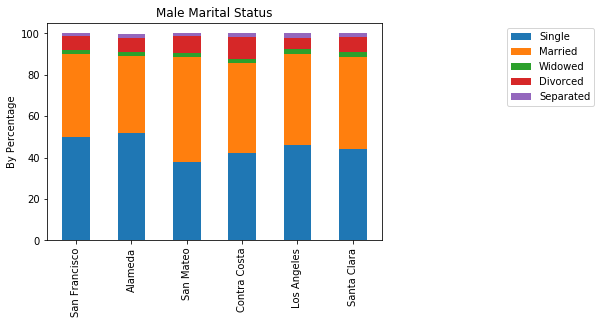

In [15]:
#Fix County Name
N = 6
ind = np.arange(N)
width = 0.50

p1 = plt.bar(ind,male_single,width)
p2 = plt.bar(ind,male_married,width,bottom = male_single)
p3 = plt.bar(ind,male_widowed,width,bottom = male_single+male_married)
p4 = plt.bar(ind,male_divorced,width,bottom =male_single+male_married+male_widowed)
p5 = plt.bar(ind,male_separated,width,bottom= male_single+male_married+male_widowed+male_divorced)


plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]),
           ('Single', 'Married', "Widowed", "Divorced", "Separated"),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))

plt.ylabel('By Percentage')
plt.title('Male Marital Status')
plt.xticks(ind, ('San Francisco', 'Alameda', 'San Mateo', 'Contra Costa',
                'Los Angeles', 'Santa Clara'),rotation='vertical')

plt.show()

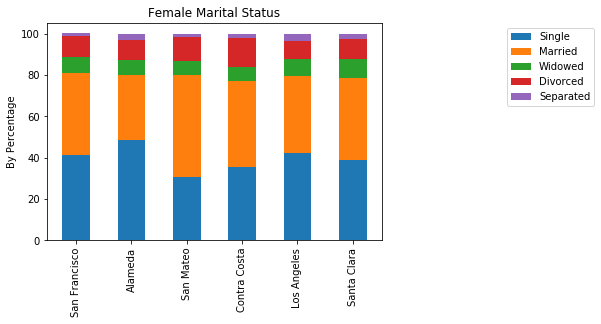

In [16]:
#Fix County Names
N = 6
ind = np.arange(N)
width = 0.50

p1 = plt.bar(ind,female_single,width)
p2 = plt.bar(ind,female_married,width,bottom = female_single)
p3 = plt.bar(ind,female_widowed,width,bottom = female_single+female_married)
p4 = plt.bar(ind,female_divorced,width,bottom =female_single+female_married+female_widowed)
p5 = plt.bar(ind,female_separated,width,bottom= female_single+female_married+female_widowed+female_divorced)


plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]),
           ('Single', 'Married', "Widowed", "Divorced", "Separated"),loc='upper right',
          bbox_to_anchor =(1.65, 1.0))

plt.ylabel('By Percentage')
plt.title('Female Marital Status')
plt.xticks(ind, ('San Francisco', 'Alameda', 'San Mateo', 'Contra Costa',
                'Los Angeles', 'Santa Clara'),rotation='vertical')

plt.show()